## <span style="font-size: 18pt; color: goldenrod; font-weight:bold">L1 regularization</u></span>

### Overview
L1 regularization, also known as <span style="font-size: 11pt; color: goldenrod; font-weight:bold">Lasso regularization</u></span>, is a technique used in <span style="font-size: 11pt; color: steelblue; font-weight:bold">Machine Learning</u></span> to **prevent overfitting and improve the generalization of models**. It adds a <u>penalty</u> term to the loss function that is <u>proportional to the absolute values of the model's parameters</u>. By doing so, L1 regularization **encourages the model to have sparse weights**, effectively setting some of the less important features' coefficients to zero.

***
L1 regularization gets its name "Lasso" from "<span style="font-size: 11pt; color: goldenrod; font-weight:bold">Least Absolute Shrinkage and Selection Operator</u></span>." It not only shrinks the weights towards zero but also <u>performs feature selection by setting some weights exactly to zero</u>. This property makes Lasso popular in applications where feature selection is crucial.
***

L1 regularization is commonly used in linear regression, logistic regression, and other models with linear-like properties. It is especially prevalent in Lasso regression, where it helps identify the most relevant features for the model.

### Mathematical Notation:
The L1 regularization term can be represented as:

$$ \text{L1 Regularization Term} = \lambda \sum_{i=1}^{n} |w_i| $$

Where:
- $\lambda(lambda)$ is the regularization parameter, controlling the strength of the regularization.
- $ w_i $ represents the model's weight or coefficient for the $i$-th feature.

The total loss function with L1 regularization is usually represented as:  

$$\text{Total Loss} = \text{Original Loss} + \text{L1 Regularization Term}$$

### Usage Details:
- The regularization strength $\lambda$ is a hyperparameter that needs to be tuned, typically through cross-validation.- The regularization strength $\lambda$ is a hyperparameter that needs to be tuned, typically through cross-validation.
- L1 regularization is useful when dealing with high-dimensional data and when you suspect that many features may be irrelevant or less important.
- L1 regularization can drive some weights to exactly zero, effectively performing feature selection.
- Compared to L2 regularization (Ridge regularization), L1 regularization tends to produce more sparse models.


## Code Example
Simple Python code, demonstrating L1 regularized model (Lasso) perfomance, compared to standard linear model on data where not all features are relevant.

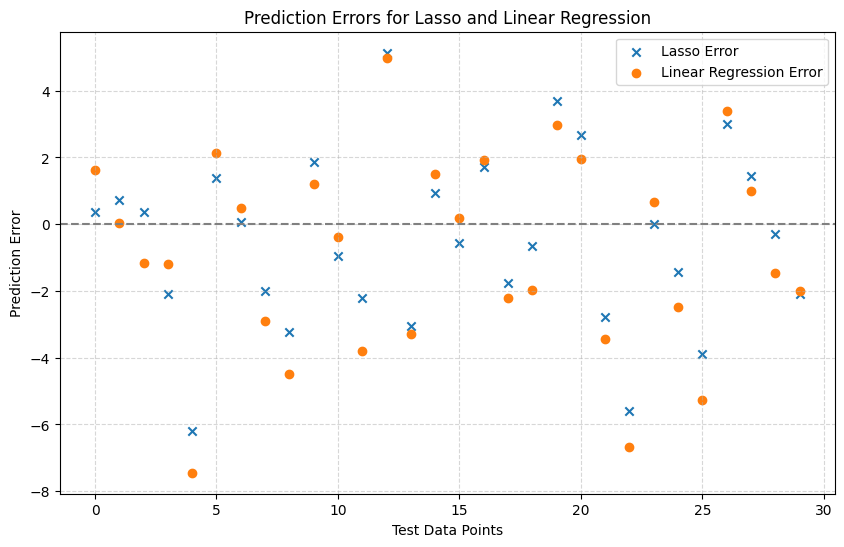

Mean Squared Error (Lasso): 6.825722473013061
Mean Squared Error (Linear Regression): 9.411780761656802


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Number of data points
num_points = 100

# Generating random data for features (X1, X2, ..., X10)
np.random.seed(42)  # For reproducibility
X = np.random.rand(num_points, 10) * 10  # Scale the random values to a range of [0, 10]

# Generating corresponding random target variable (y) with some noise
np.random.seed(42)  # For reproducibility
y = 2 * X[:, 0] + 3 * X[:, 1] + 1.5 * X[:, 2] - 4 * X[:, 3] + 0.5 * X[:, 4] + np.random.randn(num_points) * 3

# Add somewhat relevant features (X5 and X6)
X[:, 5] = X[:, 0] + X[:, 1] + np.random.randn(num_points) * 2
X[:, 6] = X[:, 3] + X[:, 4] + np.random.randn(num_points) * 2

# Add irrelevant features (X7, X8, X9, and X10)
X = np.hstack((X, np.random.randn(num_points, 4) * 3**np.random.randn()))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Lasso and simple linear regression models
lasso_model = Lasso()
linear_model = LinearRegression()

# Fit linear model on the training data
linear_model.fit(X_train, y_train)

# Perform Hyperparameter tuning using GridSearchCV for Lasso model
param_distributions = {
    'alpha': np.logspace(-5, 2, 100)  # Range of alpha values to try
}

grid_search = GridSearchCV(lasso_model, param_distributions, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the predictions for both models
y_pred_lasso = grid_search.predict(X_test)
y_pred_linear = linear_model.predict(X_test)

# Calculate individual errors for each data point
lasso_errors = y_test - y_pred_lasso
linear_errors = y_test - y_pred_linear

# Plotting the errors for each data point
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), lasso_errors, label='Lasso Error', marker='x')
plt.scatter(range(len(y_test)), linear_errors, label='Linear Regression Error', marker='o')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Test Data Points')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors for Lasso and Linear Regression')
plt.grid(True, ls='dashed', alpha=0.5)
plt.legend()
plt.show()

# Calculate MSE for Lasso and classic LinearRegression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print("Mean Squared Error (Lasso):", mse_lasso)
print("Mean Squared Error (Linear Regression):", mse_linear)


As we may see, Lasso model achieved significantly better results, compared to standard linear regression model.

This is because Lasso regularization is more advantageous on data with non-informative features compared to a linear model without regularization due to its ability to perform feature selection. Lasso imposes a penalty on the absolute values of the coefficients during model training, which encourages some coefficients to be exactly zero.  

As a result, Lasso automatically identifies and excludes irrelevant features from the final model, leading to a more interpretable model.